In [4]:
# importing libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

# Importing Data

In [8]:
data = pd.read_csv("us_retail_sales.csv")
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0
5,1997,202371,204286,204990,203399,201699,204675,207014.0,207635.0,208326.0,208078.0,208936.0,209363.0
6,1998,209666,209552,210832,213633,214639,216337,214841.0,213636.0,215720.0,219483.0,221134.0,223179.0
7,1999,223997,226250,227417,229037,231235,231903,233948.0,236566.0,237481.0,237553.0,240544.0,245485.0
8,2000,243436,247133,249825,245831,246201,248160,247176.0,247576.0,251837.0,251221.0,250331.0,250658.0
9,2001,252654,252704,250328,254763,255218,254022,252997.0,254560.0,249845.0,267999.0,260514.0,256549.0


# Reviewing the Data Set

In [6]:
# dimensions of the Retail sales dataframe
data.shape

(30, 13)

Above we see the Retail sales Data frame has 13 columns for the year and month and 30 rows that are for the sales of each year that is broken out by month.



In [7]:
# Next I will use info to see further information on each of my variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    30 non-null     int64  
 1   JAN     30 non-null     int64  
 2   FEB     30 non-null     int64  
 3   MAR     30 non-null     int64  
 4   APR     30 non-null     int64  
 5   MAY     30 non-null     int64  
 6   JUN     30 non-null     int64  
 7   JUL     29 non-null     float64
 8   AUG     29 non-null     float64
 9   SEP     29 non-null     float64
 10  OCT     29 non-null     float64
 11  NOV     29 non-null     float64
 12  DEC     29 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.2 KB


Above we can see that July through December are float64 due to the fact that we have NaNs for those months in 2022



In [9]:
# Next I will check and see what variables have NA values and what percentage of the variable is NA
data.isnull().sum()/len(data)

YEAR    0.000000
JAN     0.000000
FEB     0.000000
MAR     0.000000
APR     0.000000
MAY     0.000000
JUN     0.000000
JUL     0.033333
AUG     0.033333
SEP     0.033333
OCT     0.033333
NOV     0.033333
DEC     0.033333
dtype: float64

As suspected we see that July through December have a 0.033333 percent of NaNs that come from 2021. We will create a model to predict the monthly retail sales on the last year of data so I will not adjust these NANs at the moment.

In [11]:
# Next I will use melt to transform my data frame
data = pd.melt(data, id_vars = ['YEAR'], var_name = 'Month', value_name = 'Sales')
data

,YEAR,Month,Sales
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0
...,...,...,...
355,2017,DEC,433282.0
356,2018,DEC,434803.0
357,2019,DEC,458055.0
358,2020,DEC,484782.0


In [12]:
# I will now use info to view my Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    360 non-null    int64  
 1   Month   360 non-null    object 
 2   Sales   354 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


In [13]:
# I will now use replace to change my months from float to an int
data['Month'].replace({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
                'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}, inplace = True)
data

,YEAR,Month,Sales
0,1992,1,146925.0
1,1993,1,157555.0
2,1994,1,167518.0
3,1995,1,182413.0
4,1996,1,189135.0
...,...,...,...
355,2017,12,433282.0
356,2018,12,434803.0
357,2019,12,458055.0
358,2020,12,484782.0


In [15]:
# I will now use to_datetime to combine year and month and create a date variable 
data['DATE'] = pd.to_datetime(data[['YEAR', 'Month']].assign(DAY = 1))
data

,YEAR,Month,Sales,DATE
0,1992,1,146925.0,1992-01-01
1,1993,1,157555.0,1993-01-01
2,1994,1,167518.0,1994-01-01
3,1995,1,182413.0,1995-01-01
4,1996,1,189135.0,1996-01-01
...,...,...,...,...
355,2017,12,433282.0,2017-12-01
356,2018,12,434803.0,2018-12-01
357,2019,12,458055.0,2019-12-01
358,2020,12,484782.0,2020-12-01


# Step 1: Plot the data with proper labeling and make some observations on the graph.

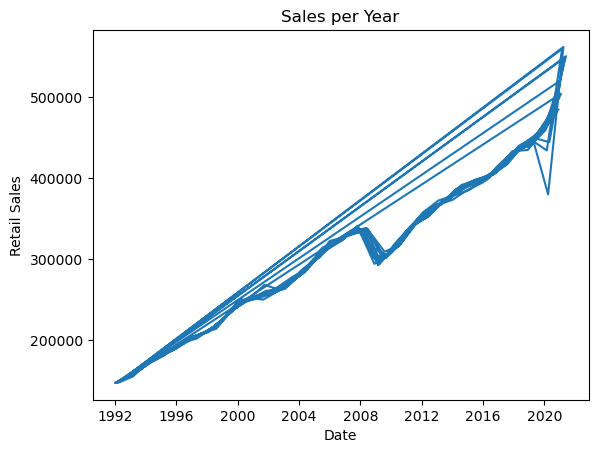

In [16]:
# I will create a plot that shows the sales per year 
x = data.DATE
y = data.Sales
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.title("Sales per Year")
plt.show()

Above we see that the retial sales rise up until 2008 and the we see adip due to the market crash and we see another dip in 2020 and a sharp rise right after. This is most likely due to the pandemic as when everyone got furlowed or even lost their job they tried to spend less.



# Step 2: Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [17]:
# First I will split the data into training and test set for July 2020 – June 2021 of data as the test set 
# and the rest as the training set
train_df = data[data['DATE'] < '2020-07-01']
test_df = data[data['DATE'] >= '2020-07-01']

In [18]:
# Next I will split the target variable from the feature
X_train = test_df[['DATE']]
Y_train = test_df[['Sales']]

# Step 3: Use the training set to build a predictive model for the monthly retail sales.

In [19]:
# I will pull muy sales data
Sale = train_df[['Sales']]

In [20]:
Sale.index = pd.DatetimeIndex(Sale.index).to_period('M')

In [21]:
# I will now fit my model with the use of SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
ARMA_model = SARIMAX(Sale, order = (1, 0, 1))

In [22]:
ARMA_model = ARMA_model.fit()

# Step 4: Use the model to predict the monthly retail sales on the last year of data.

In [23]:
# I will use my ARMA_model to predict my monthly retail sales
y_pred = ARMA_model.get_forecast(len(test_df.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df['Predictions'] = ARMA_model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_df.index
y_pred_out = y_pred_df["Predictions"] 

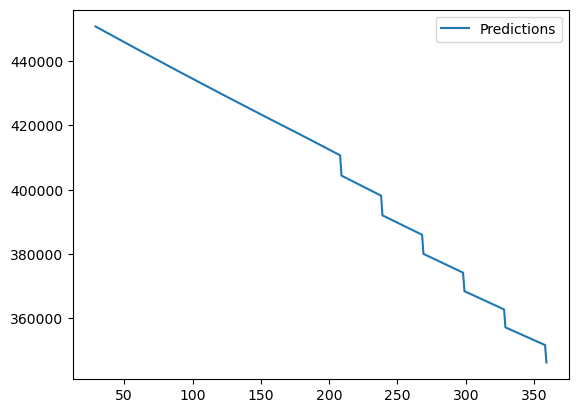

In [24]:
# I will now plot my prediction for my monthly sales
plt.plot(y_pred_out, label = 'Predictions')
plt.legend()

We see as tim goes on we see a decrease in sales



# Step 5: Report the RMSE of the model predictions on the test set.

In [25]:
# I will now calculate the RMSE with the use of mean_squared_error
from sklearn.metrics import mean_squared_error
test_df = test_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
arma_rmse = np.sqrt(mean_squared_error(test_df["Sales"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  234669.78470081216


Above we see we have a pretty large RMSE of 234669.78